# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Use cv2.imshow in colab

In [ ]:
from google.colab.patches import cv2_imshow

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
import datetime
print("Training the Model ....")
start_time=datetime.datetime.now()
print("Training started at: {}".format(start_time))
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end_time= datetime.datetime.now()
print("Training ended at: {}".format(end_time))
duration = end_time - start_time
print("Training Duration: {}".format(duration))


Training the Model ....
Training started at: 2022-04-09 14:56:55.423787
Epoch 1/15
422/422 [==============================] - 15s 10ms/step - loss: 0.3593 - accuracy: 0.8910 - val_loss: 0.0807 - val_accuracy: 0.9805
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1085 - accuracy: 0.9675 - val_loss: 0.0584 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0481 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0414 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0372 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023586612194776535
Test accuracy: 0.9925000071525574


## Testing the Model



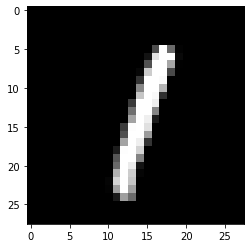

In [96]:
image = x_test[5]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [97]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 1


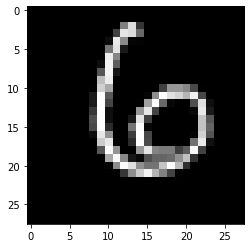

In [91]:
image = x_test[100]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [92]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 6
